# K-Means Clustering

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore
import seaborn as sns

In [49]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [50]:
# Veri setinin ilk 5 satırını inceleyelim
print("İlk 5 satır:")
print(dataset.head())

# Sayısal değişkenlerin temel istatistikleri
print("\nTemel istatistiksel özet (describe):")
print(dataset.describe())

# Eksik değer kontrolü
print("\nEksik değer sayısı (isnull().sum()):")
print(dataset.isnull().sum())

# Değişkenlerin benzersiz değer sayısı
print("\nBenzersiz değer sayısı (nunique()):")
print(dataset.nunique())

İlk 5 satır:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Temel istatistiksel özet (describe):
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%  


CustomerID sütunu için aykırı değer sayısı: 0

Age sütunu için aykırı değer sayısı: 0

Annual Income (k$) sütunu için aykırı değer sayısı: 0

Spending Score (1-100) sütunu için aykırı değer sayısı: 0


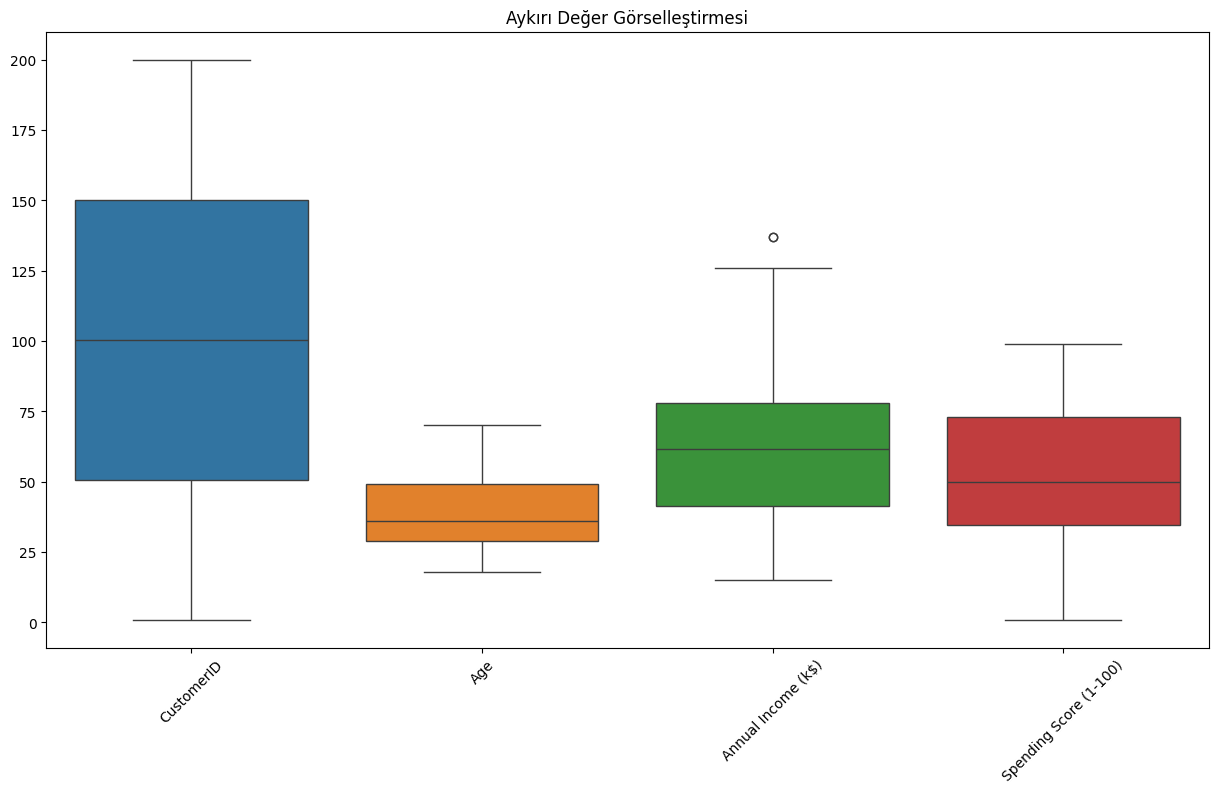

In [51]:
numeric_cols = dataset.select_dtypes(include='number')

# Z-score hesabı
z_scores = np.abs(zscore(numeric_cols))

# Aykırı değerleri belirle (Z-score > 3 olanlar genelde aykırı kabul edilir)
outliers = (z_scores > 3)

# Her sütun için kaç tane aykırı değer var
for i, col in enumerate(numeric_cols.columns):
    print(f"\n{col} sütunu için aykırı değer sayısı: {np.sum(outliers[:, i])}")
# Aykırı değer grafiği
plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title('Aykırı Değer Görselleştirmesi')
plt.show()


Korelasyon Matrisi:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


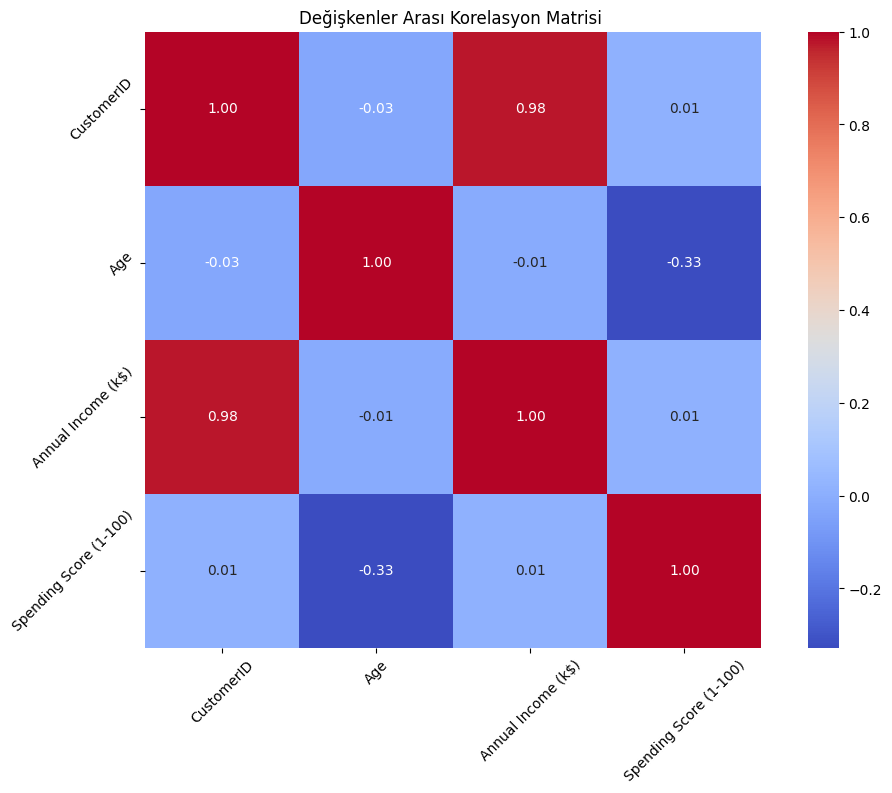

In [58]:

corr_matrix = dataset.select_dtypes(include=['number']).corr()

# Korelasyon matrisi
print("\nKorelasyon Matrisi:")
print(corr_matrix)

# Korelasyon matrisi ısı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Değişkenler Arası Korelasyon Matrisi ')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Silhouette Skoru: 0.554


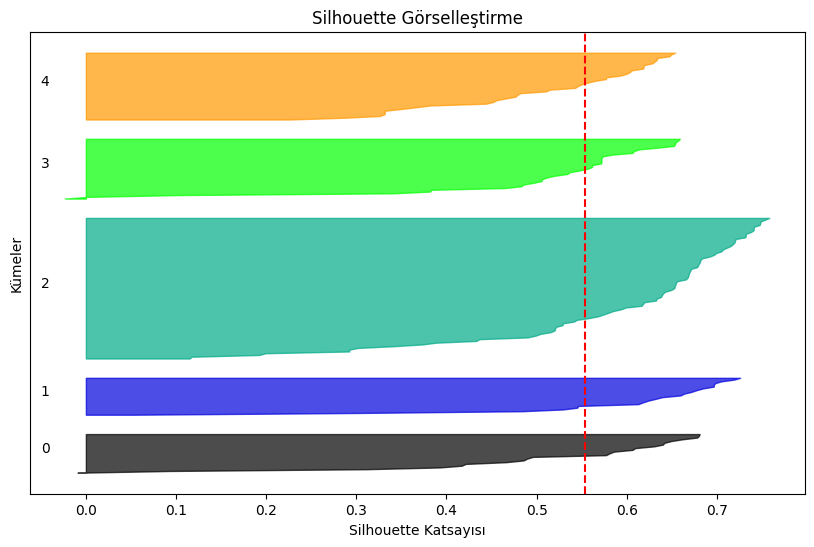

In [73]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
# X: Kullandığın özellikler (nümerik veri, clustering'e girdiğin veri)
# labels: Clustering sonucu elde ettiğin kümeler (modelin predict veya labels_ çıktısı)

# Örnek kullanım (KMeans için)
from sklearn.cluster import KMeans

# KMeans uygulayalım (örnek için 3 küme)
kmeans = KMeans(n_clusters=5, random_state=90)
labels = kmeans.fit_predict(X)

# Silhouette skoru hesapla
score = silhouette_score(X, labels)

print(f"Silhouette Skoru: {score:.3f}")

# Silhouette skorlarını her nokta için hesapla
sample_silhouette_values = silhouette_samples(X, labels)

n_clusters = len(np.unique(labels))
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouette Görselleştirme")
ax1.set_xlabel("Silhouette Katsayısı")
ax1.set_ylabel("Kümeler")

ax1.axvline(x=score, color="red", linestyle="--")
ax1.set_yticks([])
plt.show()

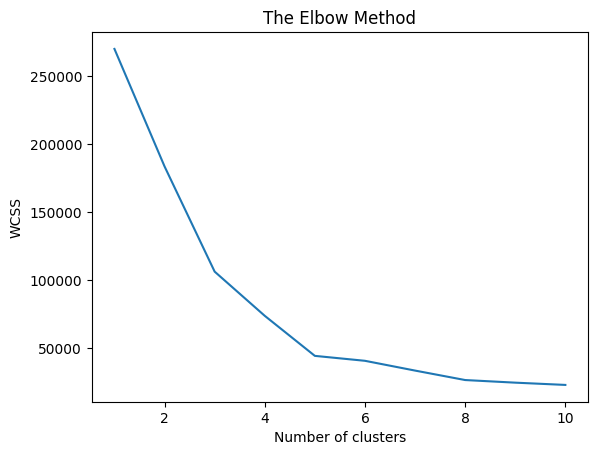

In [52]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [53]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualising the clusters

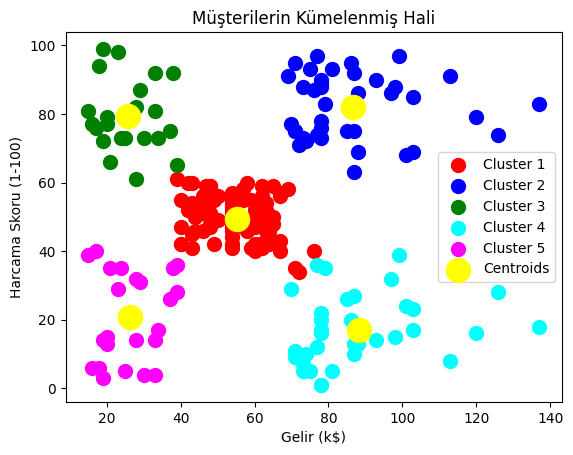

In [54]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Müşterilerin Kümelenmiş Hali')
plt.xlabel('Gelir (k$)')
plt.ylabel('Harcama Skoru (1-100)')
plt.legend()
plt.show()